In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Cell:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def set_x(self, x):
        self.x = x
    def set_y(self, y):
        self.y = y

class Coord:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def set_x(self, x):
        self.x = x
    def set_y(self, y):
        self.y = y

In [3]:
max_state = 100
num_rows = 6
num_cols = 6
count_grid = np.zeros(num_rows * num_cols)
total_counts = 0
running_max = 0


def x_y_to_index(x, y):
    global max_state, num_rows, num_cols
    resolution_y = 2 * max_state / num_rows
    resolution_x = 2 * max_state / num_cols
    row = int((y + max_state) / resolution_y)
    col = int((x + max_state) / resolution_x)
    row = max(0, min(num_rows - 1, row))
    col = max(0, min(num_cols - 1, col))
    return row * num_cols + col

def update_count_grid(x, y):
    global total_counts, running_max, count_grid
    index = x_y_to_index(x, y)
    count_grid[index] += 1
    total_counts += 1
    if count_grid[index] > running_max:
        running_max = count_grid[index]

def index_to_x_y(index):
    resolution_y = 2 * max_state / num_rows
    resolution_x = 2 * max_state / num_cols
    row = index // num_cols
    col = index % num_cols
    x = (2 * col + 1) / 2 * resolution_x - max_state
    y = (2 * row + 1) / 2 * resolution_y - max_state
    return Coord(x, y)

def get_sampled_x_y(sampled_val):
    global total_counts, running_max, count_grid
    counts_tot = (running_max + 1) * num_rows * num_cols - total_counts
    target = sampled_val * counts_tot
    for i in range(num_rows * num_cols):
        target -= ((running_max + 1) - count_grid[i])
        if target <= 0:
            return index_to_x_y(i)

def x_y_to_cell(x, y):
    global max_state, num_rows, num_cols
    resolution_y = 2 * max_state / num_rows
    resolution_x = 2 * max_state / num_cols
    row = int((y + max_state) / resolution_y)
    col = int((x + max_state) / resolution_x)
    row = max(0, min(num_rows - 1, row))
    col = max(0, min(num_cols - 1, col))
    return Cell(col, row)

10156


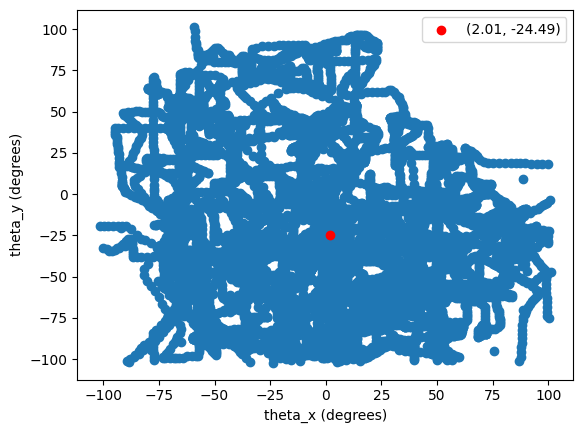

In [4]:
data_wobbly = pd.read_csv('../data/limb_data/data_collection_wobble_stiff.txt')[:10156]
plt.scatter(data_wobbly['theta_x'], data_wobbly['theta_y'])
plt.scatter(np.mean(data_wobbly['theta_x']), np.mean(data_wobbly['theta_y']), color='r', label='({:.2f}, {:.2f})'.format(np.mean(data_wobbly['theta_x']), np.mean(data_wobbly['theta_y'])))
plt.xlabel('theta_x (degrees)')
plt.ylabel('theta_y (degrees)')
plt.legend()
print(len(data_wobbly))

10156


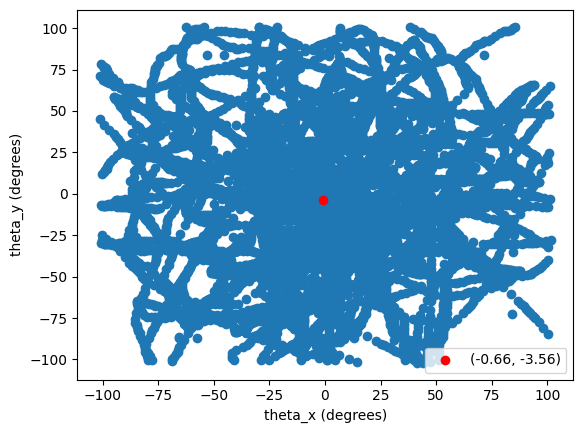

In [5]:
data_random_walk = pd.read_csv('../data/limb_data/data_collection_random_walk_stiff.txt')
plt.scatter(data_random_walk['theta_x'], data_random_walk['theta_y'])
plt.scatter(np.mean(data_random_walk['theta_x']), np.mean(data_random_walk['theta_y']), color='r', label='({:.2f}, {:.2f})'.format(np.mean(data_random_walk['theta_x']), np.mean(data_random_walk['theta_y'])))
plt.xlabel('theta_x (degrees)')
plt.ylabel('theta_y (degrees)')
plt.legend()
print(len(data_random_walk))

In [6]:
# # %matplotlib ipympl
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# # plt.rcParams["animation.html"] = "jshtml"

# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np

# # Example data
# x = np.array(data_random_walk['theta_x'].values)
# y = np.array(data_random_walk['theta_y'].values)

# # Create a figure and axis
# fig, ax = plt.subplots()

# line = ax.scatter([], [], color='b')

# # Function to update the animation
# def init():
#     ax.set_xlim(-100, 100)
#     ax.set_ylim(-100, 100)
#     return line,

# def update(num):
#     line.set_offsets(np.c_[x[:num], y[:num]])
#     return line,

# # Create the animation
# ani = animation.FuncAnimation(fig, update, init_func=init, frames=360, interval=50, blit=True)

# # To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=15,
#                                 metadata=dict(artist='Me'),
#                                 bitrate=1800)
# ani.save('scatter.gif', writer=writer)
# # Display the animation
# plt.show()


In [25]:
# count_grid = np.zeros((6, 6))
prob_grid = np.zeros_like(count_grid)
count_grid = np.zeros(num_rows * num_cols)
grids =[]
c_grids = []
x = np.array(data_random_walk['theta_x'].values)
y = np.array(data_random_walk['theta_y'].values)
for i in range(len(x)):
    update_count_grid(x[i], y[i])
    counts_tot = (running_max + 1) * num_rows * num_cols - total_counts
    prob_grid = (running_max + 1 - count_grid) / counts_tot
    if i % 1000 == 0:
        # print(prob_grid)
        grids.append(np.copy(prob_grid))
        c_grids.append(np.copy(count_grid))


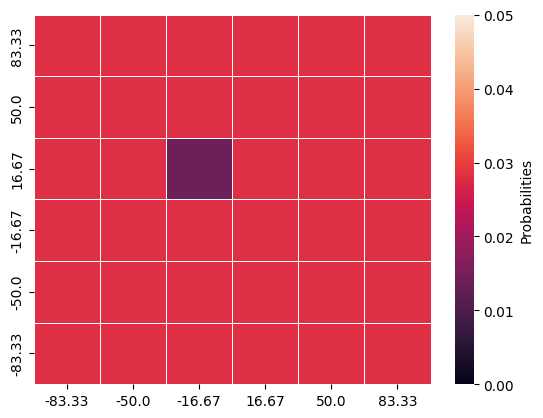

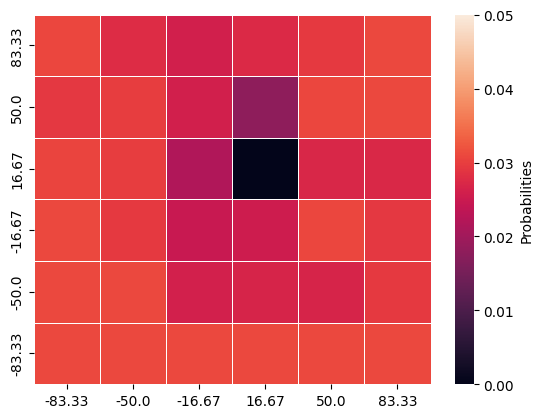

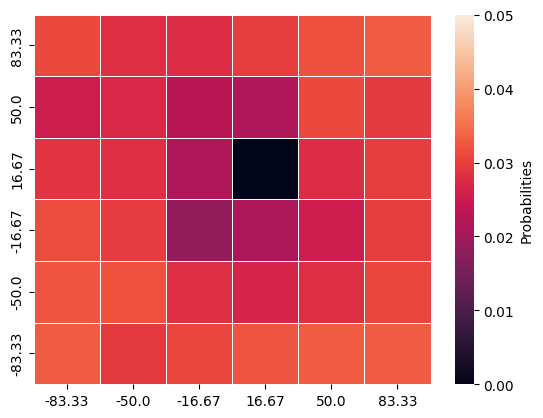

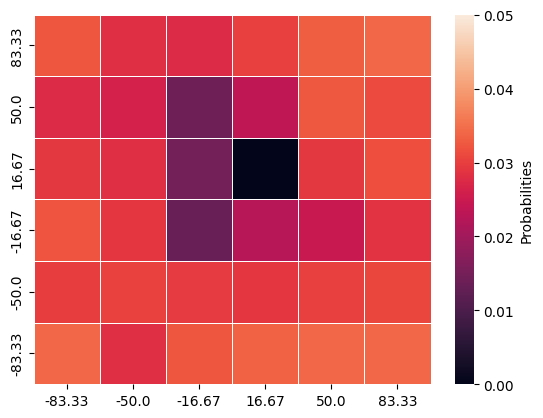

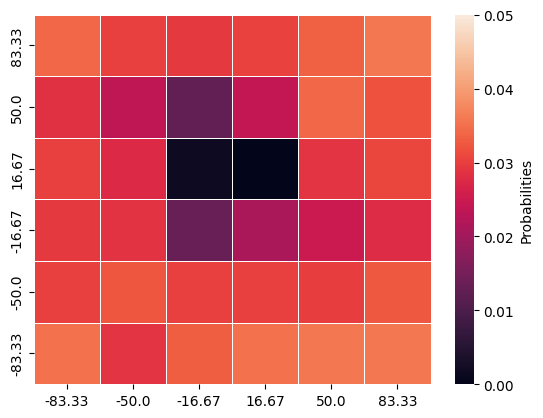

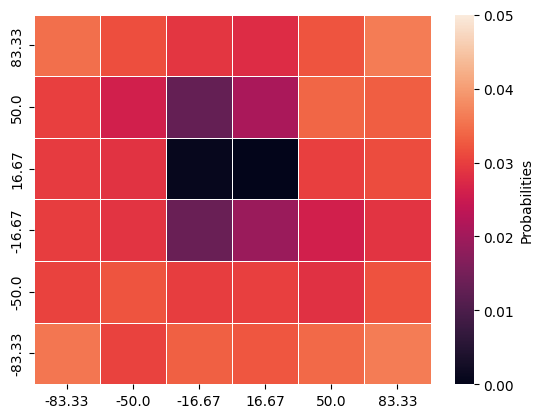

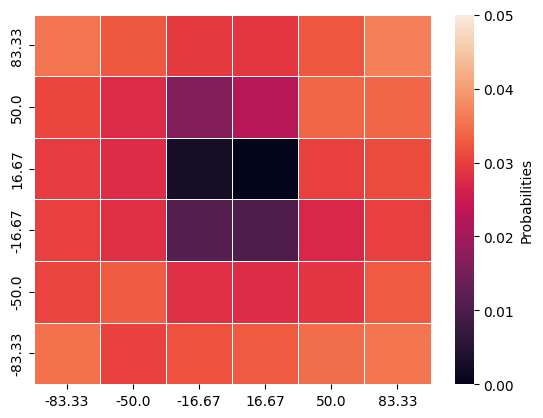

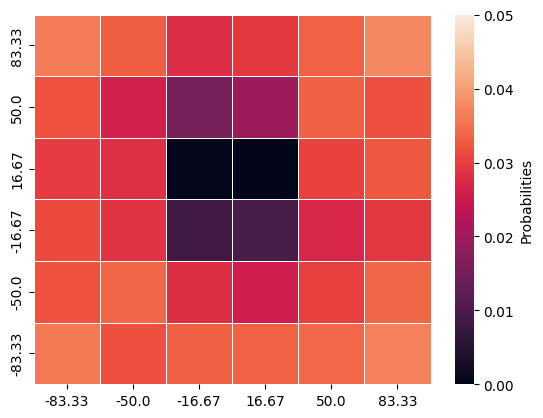

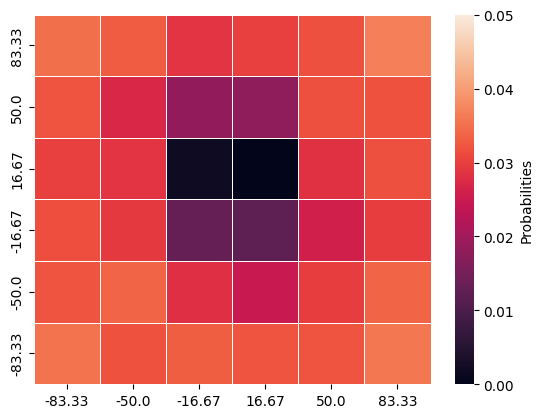

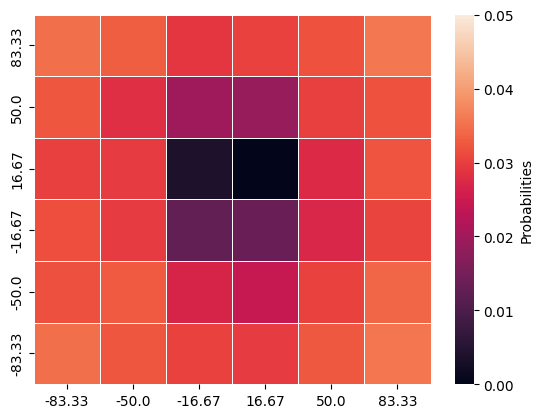

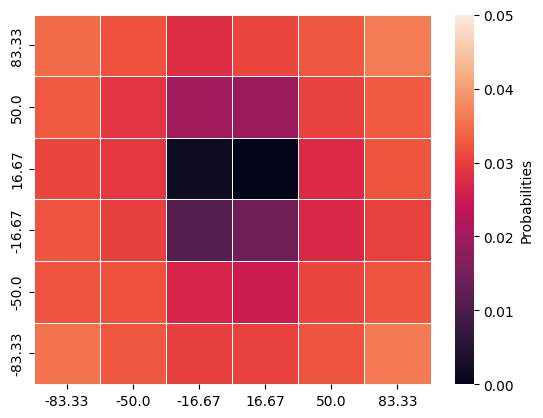

In [24]:
import seaborn as sns
x_ticks = np.round(np.linspace(-100, 100, num_rows+1)[:-1] +200/12, decimals=2)
y_ticks = x_ticks[::-1]

for g in grids:
    ax = sns.heatmap(g.reshape(num_rows, num_cols), 
                     linewidth=0.5, 
                     cbar_kws={'label': 'Probabilities'},
                     xticklabels=x_ticks, yticklabels=y_ticks,
                     vmin=0, vmax=0.05)
    plt.show()

In [22]:
tick_values = np.linspace(-100, 100, num_rows+1)[:-1] +200/12
tick_values

array([-83.33333333, -50.        , -16.66666667,  16.66666667,
        50.        ,  83.33333333])

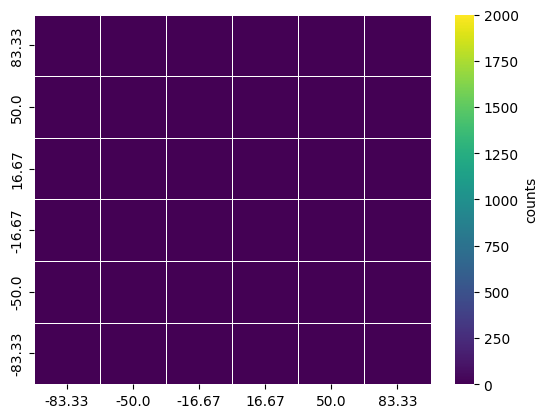

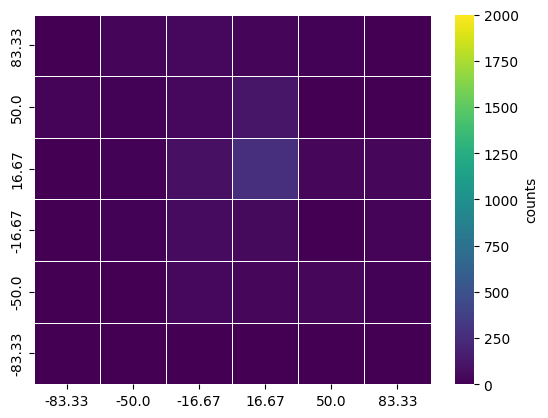

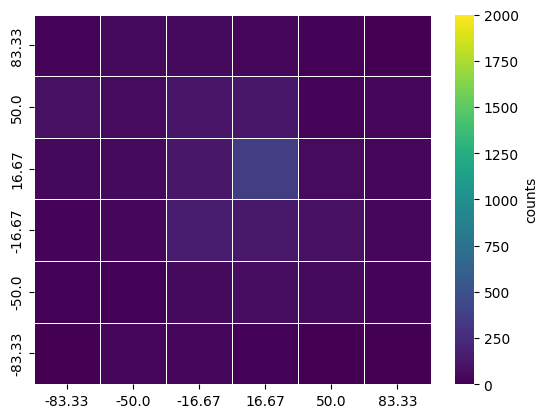

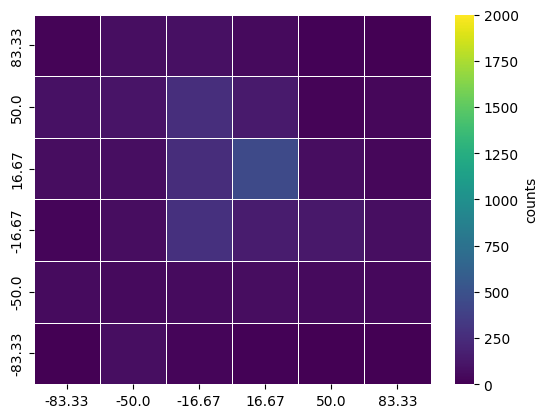

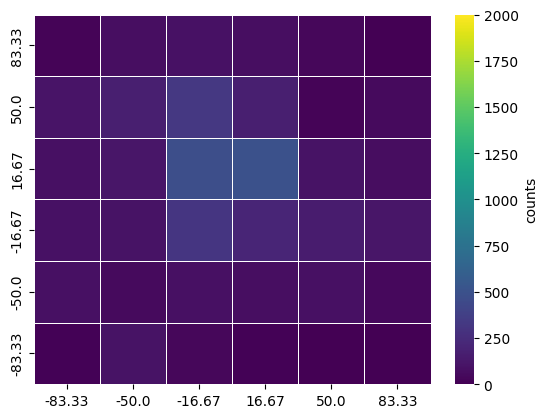

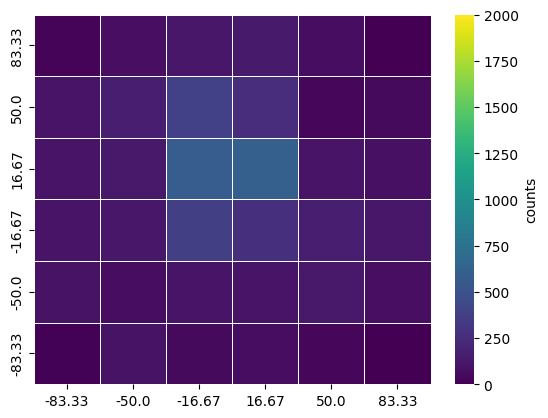

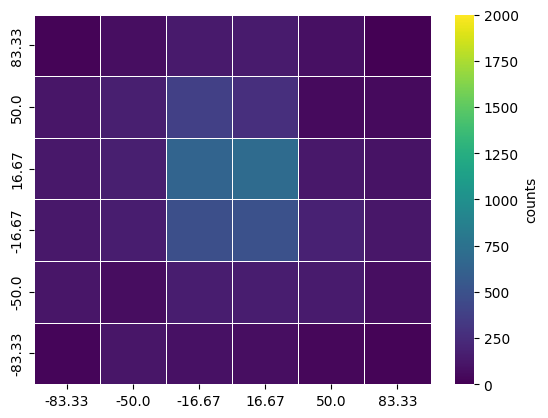

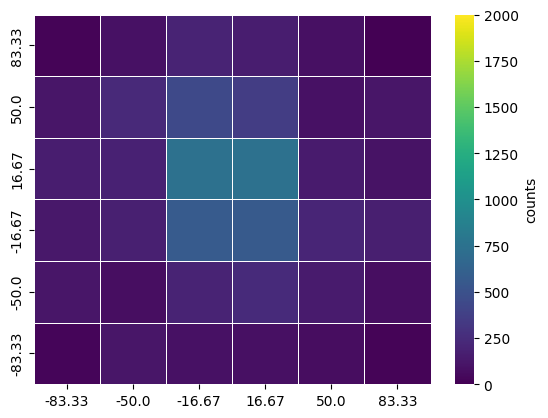

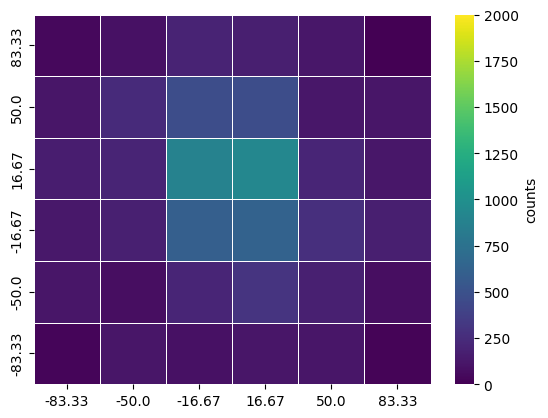

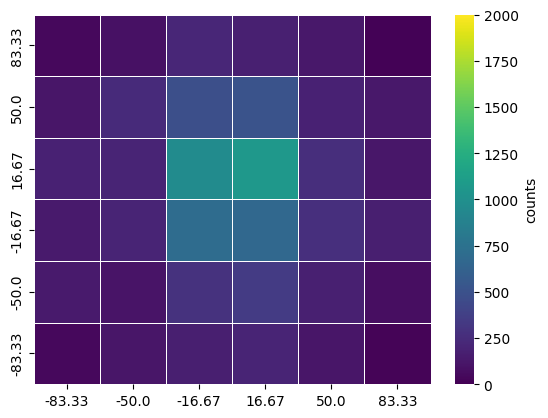

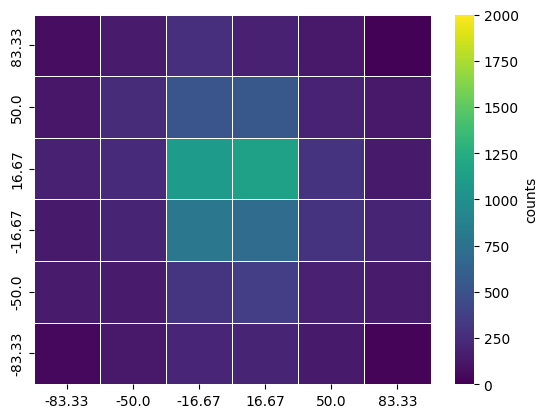

In [27]:
for g in c_grids:
    ax = sns.heatmap(g.reshape(num_rows, num_cols), 
                     cmap='viridis',
                     linewidth=0.5, 
                     cbar_kws={'label': 'counts'},
                     xticklabels=x_ticks, yticklabels=y_ticks,
                     vmin=0, vmax=2000)
    plt.show()